In [108]:
%matplotlib inline

In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.


['train.csv.zip', 'test.csv', 'test.csv.zip', 'train.csv', 'sample_submission.csv.zip', 'sample_submission.csv']


In [110]:
import mlxtend
import pandas_profiling

import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew #for some statistics



In [111]:
train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [112]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


# EDA

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [114]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [115]:
from scipy.stats import skew
skew(train_df["y"])

1.2060958289669412

In [116]:
train_df.y.skew()

1.206525852242492

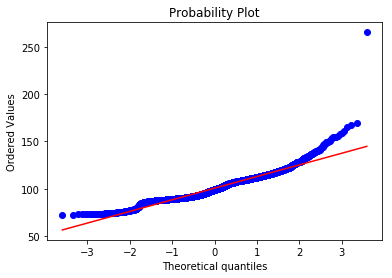

In [117]:
from scipy import stats
import matplotlib.pyplot as plt

res = stats.probplot(train_df['y'], plot=plt)

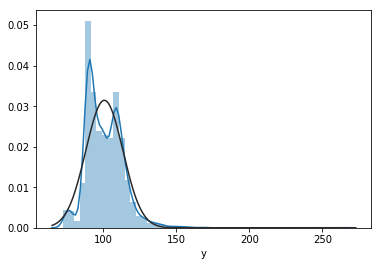

In [118]:
sns.distplot(train_df.y, fit=norm)

np.log1pを適用したが、余り変化なかった

In [119]:
train_df.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [120]:
train_df.shape

(4209, 378)

In [121]:
train_df.isnull().all().all()

False

In [122]:
train_df.dtypes.value_counts()

int64      369
object       8
float64      1
dtype: int64

## check object type columns

In [123]:
train_df_object_type = train_df[[x for x in train_df.columns if train_df[x].dtypes == "object"]]
train_df_object_type.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


In [124]:
train_df_object_type.describe()

,X0,X1,X2,X3,X4,X5,X6,X8
count,4209,4209,4209,4209,4209,4209,4209,4209
unique,47,27,44,7,4,29,12,25
top,z,aa,as,c,d,v,g,j
freq,360,833,1659,1942,4205,231,1042,277


In [125]:
train_df_object_type.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
am     18
aq     18
i      18
u      17
aw     16
l      16
ad     14
k      11
b      11
au     11
as     10
r      10
bc      6
ao      4
c       3
aa      2
q       2
g       1
ab      1
ac      1
Name: X0, dtype: int64

## view correlation

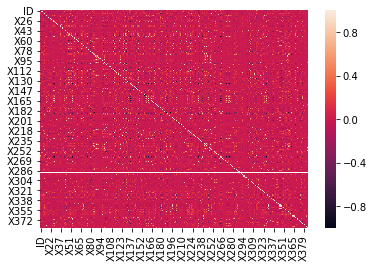

In [126]:
corr = train_df.corr()
sns.heatmap(corr)

In [127]:
corr

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,1.000000,-0.055108,0.001602,NaN,0.058988,-0.031917,-0.025438,0.002237,-0.036480,-0.038171,...,0.045229,-0.080259,-0.022965,0.030371,0.023382,-0.013577,-0.038171,-0.009332,-0.015355,0.029059
y,-0.055108,1.000000,-0.026985,NaN,0.089792,0.048276,0.193643,0.023116,0.048946,-0.159815,...,0.029100,0.114005,0.061403,-0.258679,0.067919,0.040932,-0.159815,0.040291,-0.004591,-0.022280
X10,0.001602,-0.026985,1.000000,NaN,-0.033084,-0.028806,-0.100474,-0.002532,-0.005944,-0.010164,...,0.165277,-0.028618,-0.074244,-0.016870,-0.011374,-0.010479,-0.010164,-0.004740,-0.002532,-0.004387
X11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X12,0.058988,0.089792,-0.033084,NaN,1.000000,0.214825,-0.246513,-0.006212,-0.014584,-0.024937,...,-0.107864,-0.070214,0.030134,-0.016043,-0.027907,-0.005566,-0.024937,-0.011628,-0.006212,-0.010765
X13,-0.031917,0.048276,-0.028806,NaN,0.214825,1.000000,-0.083141,-0.005409,-0.012698,-0.021713,...,-0.169721,-0.061136,0.357229,-0.036040,-0.024299,0.023045,-0.021713,-0.010125,0.041242,-0.009373
X14,-0.025438,0.193643,-0.100474,NaN,-0.246513,-0.083141,1.000000,-0.018865,-0.044291,0.012713,...,0.118950,0.026496,-0.097464,-0.037958,0.103309,0.007743,0.012713,0.023604,0.025199,0.043667
X15,0.002237,0.023116,-0.002532,NaN,-0.006212,-0.005409,-0.018865,1.000000,-0.001116,-0.001908,...,-0.014917,-0.005373,0.032168,-0.003168,-0.002136,-0.001968,-0.001908,-0.000890,-0.000475,-0.000824
X16,-0.036480,0.048946,-0.005944,NaN,-0.014584,-0.012698,-0.044291,-0.001116,1.000000,-0.004480,...,-0.025036,-0.012615,0.045461,-0.007437,-0.005014,-0.004619,-0.004480,-0.002089,-0.001116,-0.001934
X17,-0.038171,-0.159815,-0.010164,NaN,-0.024937,-0.021713,0.012713,-0.001908,-0.004480,1.000000,...,-0.059883,-0.021571,-0.059327,-0.012716,-0.008573,-0.007899,1.000000,-0.003572,-0.001908,-0.003307


In [128]:
corr_values = corr.iloc[0]
print(corr_values.sort_values().head())
print(corr_values.sort_values().tail())

X22    -0.096610
X343   -0.087157
X139   -0.082273
X376   -0.080259
X335   -0.077241
Name: ID, dtype: float64
X290   NaN
X293   NaN
X297   NaN
X330   NaN
X347   NaN
Name: ID, dtype: float64


In [129]:
obj_columns = train_df.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [train_df.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[2, 3, 4, 5, 6, 7, 8, 9]


## see nan

In [130]:
train_df.isna().all().all()

False

In [131]:
test_df.isna().all().all()

False

**no nan value**

# feature eng

In [132]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['y'], axis=1, inplace=True)

In [133]:
all_data.shape

(8418, 377)

## skew feature

In [134]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(
    lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
X233,91.73331
X297,91.73331
X11,91.73331
X235,91.73331
X268,91.73331
X296,91.73331
X295,91.73331
X293,91.73331
X290,91.73331
X330,91.73331


In [135]:
skewness.tail(10)

,Skew
X61,-4.316619
X229,-4.415272
X120,-4.534135
X136,-4.592909
X263,-4.607904
X128,-4.692647
X361,-5.000386
X111,-6.076302
X74,-26.429178
X205,-45.842126


## find binary feature

## Box Cox Transformation of (highly) skewed features

almost all are binary features.

need to exclude binary for trans


# prepare train/test data

In [32]:
from sklearn.model_selection import cross_val_score, train_test_split

## with categorical feature
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat

In [33]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train_df_with_cat = train_df.drop("y", axis=1)
y_train_df = train_df["y"]

In [35]:
X_train_with_cat, X_test_with_cat, y_train_with_cat, y_test_with_cat = train_test_split(
    X_train_df_with_cat, y_train_df, 
    test_size=0.33, random_state=42)
print("train/test data shape", X_train_with_cat.shape, X_test_with_cat.shape)


train/test data shape (2820, 377) (1389, 377)


In [36]:
X_train_df_with_cat.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
1,6,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
2,7,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
3,9,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
4,13,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


## get object type columns

In [37]:
obj_columns = X_train_df_with_cat.select_dtypes(include=['object'])
print(obj_columns.columns)

cat_dims = [X_train_df_with_cat.columns.get_loc(i) for i in obj_columns.columns] 
print(cat_dims)

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')
[1, 2, 3, 4, 5, 6, 7, 8]


## without categorical feature

X_train, X_test, y_train, y_test

In [38]:
ntrain = train_df.shape[0]
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['y'], axis=1, inplace=True)

print(all_data.shape)
all_data = pd.get_dummies(all_data)
print(all_data.shape)

train_df = all_data[:ntrain]
test_df = all_data[ntrain:]

(8418, 377)
(8418, 580)


In [39]:
train_df.shape

(4209, 580)

In [40]:
train_df.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    train_df, y_train_df,
    test_size=0.33, random_state=42)
print("train/test data shape", X_train.shape, X_test.shape)


train/test data shape (2820, 580) (1389, 580)


In [42]:
X_train.head()

,ID,X10,X100,X101,X102,X103,X104,X105,X106,X107,...,X8_p,X8_q,X8_r,X8_s,X8_t,X8_u,X8_v,X8_w,X8_x,X8_y
2218,4433,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1688,3383,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2242,4487,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
582,1133,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2132,4262,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# model

In [43]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

## SVR

In [44]:
from sklearn.svm import SVR

svr = make_pipeline(
    RobustScaler(),
    SVR(C=1.0 , epsilon=0.01, kernel='rbf', gamma="auto")
#    SVR(C=1.9968596021146288 , epsilon=0.01, kernel='rbf', gamma="auto")
#    SVR(C=7.265222489759383 , epsilon=0.007563549690731845, 
#        gamma=0.000851995393908361, kernel='rbf')
#    {'C': 7.265222489759383, 'epsilon': 0.007563549690731845, 'gamma': 0.000851995393908361, 'kernel': 0}

)
score = cross_val_score(svr, X_train, y_train, scoring="r2", cv=5)

print("svr score: {0} ({1})\n".format(
    score.mean(), score.std()))

svr score: 0.39176831080790675 (0.03173651166028749)



In [45]:
score

array([0.34665415, 0.40702606, 0.40150703, 0.436975  , 0.36667932])

## LightGBM

In [46]:
import lightgbm as lgb

In [47]:
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin = 55,
    bagging_fraction = 0.8,
    bagging_freq = 5,
    feature_fraction = 0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf =6,
    min_sum_hessian_in_leaf = 11,
#    verbose=1,
#    n_jobs=3
)
score = cross_val_score(model_lgb, X_train, y_train, scoring="r2", cv=5)

print("svr score: {0} ({1})\n".format(
    score.mean(), score.std()))

svr score: 0.5859746768288435 (0.03227730853334071)



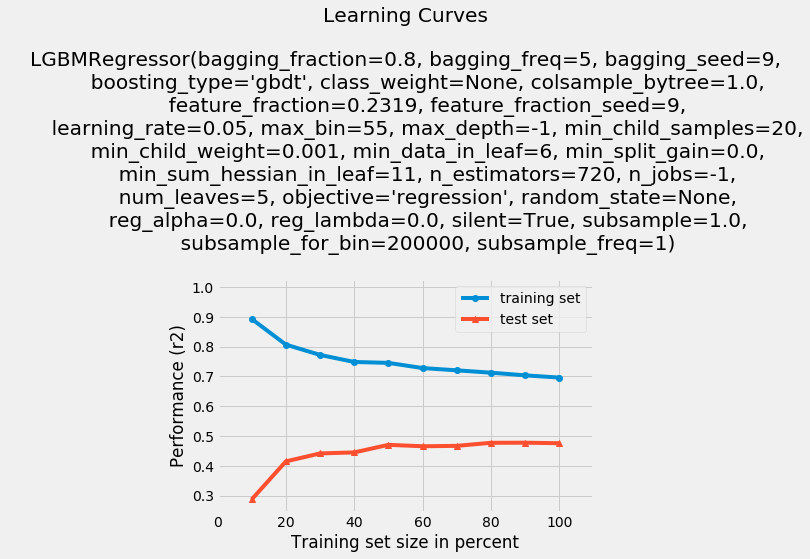

In [48]:
from mlxtend.plotting import plot_learning_curves

plot_learning_curves(X_train, y_train, X_test, y_test,
                     model_lgb, scoring="r2")
plt.show()

### try to fit by all data and predict

In [49]:
model_lgb.fit(train_df, y_train_df)
model_lgb.predict(test_df)

array([ 78.21017567,  92.69370997,  79.57641383, ...,  90.93978863,
       110.61642935,  90.0785235 ])

### tried categorical_feature, but object type is not supported yet.
https://github.com/Microsoft/LightGBM/issues/1020

## catboost

In [50]:
from catboost import CatBoostRegressor

print(list(obj_columns.columns.values))
print(cat_dims)

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
[1, 2, 3, 4, 5, 6, 7, 8]


In [51]:
X_train_with_cat.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2218,4433,ak,v,r,c,d,k,d,i,0,...,0,0,1,0,0,0,0,0,0,0
1688,3383,aw,l,as,d,d,ae,k,l,0,...,0,0,0,0,0,0,0,0,0,0
2242,4487,r,c,as,c,d,k,j,u,0,...,0,0,1,0,0,0,0,0,0,0
582,1133,y,i,as,d,d,c,j,f,0,...,0,0,1,0,0,0,0,0,0,0
2132,4262,v,u,as,c,d,l,j,y,0,...,1,0,0,0,0,0,0,0,0,0


In [52]:
catReg = CatBoostRegressor(learning_rate=1,
                          depth=6,
                          loss_function='RMSE')

fit_model = catReg.fit(X_train_with_cat, y_train_with_cat, cat_features=cat_dims)


0:	learn: 13.1333023	total: 63.3ms	remaining: 1m 3s
1:	learn: 9.4376440	total: 76ms	remaining: 37.9s
2:	learn: 9.0721935	total: 90.5ms	remaining: 30.1s
3:	learn: 8.7291396	total: 105ms	remaining: 26.2s
4:	learn: 8.6432124	total: 119ms	remaining: 23.7s
5:	learn: 8.2135283	total: 131ms	remaining: 21.7s
6:	learn: 8.2001845	total: 145ms	remaining: 20.6s
7:	learn: 8.1630422	total: 155ms	remaining: 19.2s
8:	learn: 8.1496401	total: 163ms	remaining: 18s
9:	learn: 8.1287775	total: 177ms	remaining: 17.6s
10:	learn: 8.0464367	total: 191ms	remaining: 17.2s
11:	learn: 8.0328509	total: 207ms	remaining: 17s
12:	learn: 8.0034897	total: 223ms	remaining: 16.9s
13:	learn: 8.0017158	total: 242ms	remaining: 17.1s
14:	learn: 7.9397254	total: 263ms	remaining: 17.3s
15:	learn: 7.9243425	total: 280ms	remaining: 17.2s
16:	learn: 7.9150669	total: 298ms	remaining: 17.2s
17:	learn: 7.8605001	total: 310ms	remaining: 16.9s
18:	learn: 7.7761570	total: 324ms	remaining: 16.7s
19:	learn: 7.7514913	total: 339ms	remaining

171:	learn: 5.5739740	total: 2.37s	remaining: 11.4s
172:	learn: 5.5706752	total: 2.38s	remaining: 11.4s
173:	learn: 5.5553616	total: 2.39s	remaining: 11.4s
174:	learn: 5.5535425	total: 2.41s	remaining: 11.4s
175:	learn: 5.5367882	total: 2.42s	remaining: 11.3s
176:	learn: 5.5346192	total: 2.43s	remaining: 11.3s
177:	learn: 5.5159977	total: 2.45s	remaining: 11.3s
178:	learn: 5.5062042	total: 2.46s	remaining: 11.3s
179:	learn: 5.4972350	total: 2.47s	remaining: 11.3s
180:	learn: 5.4850602	total: 2.49s	remaining: 11.3s
181:	learn: 5.4788284	total: 2.51s	remaining: 11.3s
182:	learn: 5.4617752	total: 2.52s	remaining: 11.3s
183:	learn: 5.4506041	total: 2.53s	remaining: 11.2s
184:	learn: 5.4460167	total: 2.55s	remaining: 11.2s
185:	learn: 5.4107143	total: 2.56s	remaining: 11.2s
186:	learn: 5.4079792	total: 2.58s	remaining: 11.2s
187:	learn: 5.4059216	total: 2.59s	remaining: 11.2s
188:	learn: 5.3546585	total: 2.6s	remaining: 11.2s
189:	learn: 5.3432311	total: 2.62s	remaining: 11.2s
190:	learn: 5

334:	learn: 4.0680762	total: 4.46s	remaining: 8.85s
335:	learn: 4.0662903	total: 4.48s	remaining: 8.85s
336:	learn: 4.0622724	total: 4.49s	remaining: 8.84s
337:	learn: 4.0485450	total: 4.5s	remaining: 8.81s
338:	learn: 4.0435545	total: 4.51s	remaining: 8.79s
339:	learn: 4.0401869	total: 4.52s	remaining: 8.78s
340:	learn: 4.0350689	total: 4.53s	remaining: 8.76s
341:	learn: 4.0152759	total: 4.54s	remaining: 8.74s
342:	learn: 4.0143298	total: 4.55s	remaining: 8.72s
343:	learn: 4.0049145	total: 4.57s	remaining: 8.71s
344:	learn: 3.9919727	total: 4.58s	remaining: 8.7s
345:	learn: 3.9871325	total: 4.59s	remaining: 8.69s
346:	learn: 3.9828871	total: 4.6s	remaining: 8.66s
347:	learn: 3.9810851	total: 4.62s	remaining: 8.65s
348:	learn: 3.9776444	total: 4.63s	remaining: 8.64s
349:	learn: 3.9720314	total: 4.64s	remaining: 8.62s
350:	learn: 3.9709619	total: 4.65s	remaining: 8.6s
351:	learn: 3.9550374	total: 4.66s	remaining: 8.59s
352:	learn: 3.9529908	total: 4.67s	remaining: 8.57s
353:	learn: 3.94

499:	learn: 3.1839210	total: 6.77s	remaining: 6.77s
500:	learn: 3.1827499	total: 6.79s	remaining: 6.76s
501:	learn: 3.1818980	total: 6.82s	remaining: 6.76s
502:	learn: 3.1800687	total: 6.83s	remaining: 6.75s
503:	learn: 3.1764188	total: 6.85s	remaining: 6.74s
504:	learn: 3.1760446	total: 6.87s	remaining: 6.73s
505:	learn: 3.1712619	total: 6.89s	remaining: 6.72s
506:	learn: 3.1691489	total: 6.91s	remaining: 6.72s
507:	learn: 3.1682063	total: 6.93s	remaining: 6.71s
508:	learn: 3.1660372	total: 6.95s	remaining: 6.7s
509:	learn: 3.1627213	total: 6.97s	remaining: 6.7s
510:	learn: 3.1595462	total: 6.98s	remaining: 6.68s
511:	learn: 3.1463896	total: 7s	remaining: 6.67s
512:	learn: 3.1454750	total: 7.03s	remaining: 6.67s
513:	learn: 3.1400613	total: 7.05s	remaining: 6.67s
514:	learn: 3.1352202	total: 7.07s	remaining: 6.66s
515:	learn: 3.1350300	total: 7.1s	remaining: 6.66s
516:	learn: 3.1331272	total: 7.12s	remaining: 6.65s
517:	learn: 3.1327111	total: 7.14s	remaining: 6.64s
518:	learn: 3.1286

659:	learn: 2.5388454	total: 9.52s	remaining: 4.9s
660:	learn: 2.5368214	total: 9.53s	remaining: 4.89s
661:	learn: 2.5359259	total: 9.55s	remaining: 4.87s
662:	learn: 2.5356850	total: 9.56s	remaining: 4.86s
663:	learn: 2.5283262	total: 9.58s	remaining: 4.85s
664:	learn: 2.5217482	total: 9.59s	remaining: 4.83s
665:	learn: 2.5171703	total: 9.61s	remaining: 4.82s
666:	learn: 2.5141988	total: 9.62s	remaining: 4.8s
667:	learn: 2.5108894	total: 9.63s	remaining: 4.79s
668:	learn: 2.5079253	total: 9.65s	remaining: 4.77s
669:	learn: 2.4989350	total: 9.66s	remaining: 4.76s
670:	learn: 2.4975423	total: 9.68s	remaining: 4.75s
671:	learn: 2.4934170	total: 9.69s	remaining: 4.73s
672:	learn: 2.4929562	total: 9.71s	remaining: 4.72s
673:	learn: 2.4883162	total: 9.74s	remaining: 4.71s
674:	learn: 2.4834810	total: 9.76s	remaining: 4.7s
675:	learn: 2.4817358	total: 9.77s	remaining: 4.68s
676:	learn: 2.4803997	total: 9.79s	remaining: 4.67s
677:	learn: 2.4784218	total: 9.81s	remaining: 4.66s
678:	learn: 2.4

829:	learn: 2.0682485	total: 12.3s	remaining: 2.51s
830:	learn: 2.0671055	total: 12.3s	remaining: 2.5s
831:	learn: 2.0530060	total: 12.3s	remaining: 2.49s
832:	learn: 2.0498561	total: 12.3s	remaining: 2.47s
833:	learn: 2.0494606	total: 12.4s	remaining: 2.46s
834:	learn: 2.0483816	total: 12.4s	remaining: 2.45s
835:	learn: 2.0476053	total: 12.4s	remaining: 2.44s
836:	learn: 2.0462561	total: 12.4s	remaining: 2.42s
837:	learn: 2.0443519	total: 12.5s	remaining: 2.41s
838:	learn: 2.0387451	total: 12.5s	remaining: 2.39s
839:	learn: 2.0382850	total: 12.5s	remaining: 2.38s
840:	learn: 2.0366329	total: 12.5s	remaining: 2.36s
841:	learn: 2.0362656	total: 12.5s	remaining: 2.35s
842:	learn: 2.0346237	total: 12.5s	remaining: 2.33s
843:	learn: 2.0344970	total: 12.6s	remaining: 2.32s
844:	learn: 2.0334929	total: 12.6s	remaining: 2.3s
845:	learn: 2.0332344	total: 12.6s	remaining: 2.29s
846:	learn: 2.0330084	total: 12.6s	remaining: 2.28s
847:	learn: 2.0324844	total: 12.6s	remaining: 2.26s
848:	learn: 2.

988:	learn: 1.6788988	total: 14.6s	remaining: 162ms
989:	learn: 1.6775815	total: 14.6s	remaining: 148ms
990:	learn: 1.6756638	total: 14.6s	remaining: 133ms
991:	learn: 1.6755307	total: 14.7s	remaining: 118ms
992:	learn: 1.6747673	total: 14.7s	remaining: 103ms
993:	learn: 1.6741899	total: 14.7s	remaining: 88.6ms
994:	learn: 1.6734061	total: 14.7s	remaining: 73.8ms
995:	learn: 1.6719627	total: 14.7s	remaining: 59ms
996:	learn: 1.6704867	total: 14.7s	remaining: 44.3ms
997:	learn: 1.6695808	total: 14.7s	remaining: 29.5ms
998:	learn: 1.6691758	total: 14.7s	remaining: 14.8ms
999:	learn: 1.6643481	total: 14.7s	remaining: 0us


# todo

how to use R2 for scorignr

https://tech.yandex.com/catboost/doc/dg/concepts/loss-functions-docpage/

## xgboost

## sklearn GBT

# Make submission file
https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/submissions?sortBy=date&group=all&page=1

In [54]:
sub = pd.DataFrame()
sub['ID'] = test_df["ID"]
sub['y'] = model_lgb.predict(test_df)
sub.to_csv('../output/submission.csv', index=False)
